In [20]:
import pyemma
import numpy as np
import pyemma.coordinates as coor
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
from matplotlib.pyplot import cm
from collections import OrderedDict
import mdtraj as md
import itertools
import time
import indices
import pandas  as pd
from pandas import DataFrame
from indices.base import BaseComparisons as bc
from indices.faith import Faith as Fai
from indices.russell_rao import RussellRao as RR
import scipy.cluster.hierarchy as shc
from matplotlib import gridspec
from matplotlib import pyplot
import mdtraj
import seaborn as sns
from clustering import *
import collections
from sklearn.metrics.cluster import v_measure_score as v_meas
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

## Fig.1,2

In [24]:
simi_matrix=np.load('./NTL9_5000_simi_matrix.npy')
fliped_simi_matrix = np.fliplr(simi_matrix)
mirror_binary_simi=simi_matrix+np.rot90(fliped_simi_matrix)
sum_mirror_binary_simi = np.sum(mirror_binary_simi.T,axis=1)
sum_mirror_binary_simi_index = np.vstack((sum_mirror_binary_simi,range(len(sum_mirror_binary_simi)))).T
nsmbs_a = sum_mirror_binary_simi/sum_mirror_binary_simi_index[:,0].max()
log_smbs_a = np.log(sum_mirror_binary_simi)

simi_matrix=np.load('./A3D_5000_simi_matrix.npy')
fliped_simi_matrix = np.fliplr(simi_matrix)
mirror_binary_simi=simi_matrix+np.rot90(fliped_simi_matrix)
sum_mirror_binary_simi = np.sum(mirror_binary_simi.T,axis=1)
sum_mirror_binary_simi_index = np.vstack((sum_mirror_binary_simi,range(len(sum_mirror_binary_simi)))).T
nsmbs_b = sum_mirror_binary_simi/sum_mirror_binary_simi_index[:,0].max()
log_smbs_b = np.log(sum_mirror_binary_simi)

RMSD_a = np.loadtxt('./NTL9_5000_sample_RMSD.dat')
RMSD_b = np.loadtxt('./A3D_5000_sample_RMSD.dat')

Text(0, 0.5, '')

<Figure size 14400x9600 with 0 Axes>

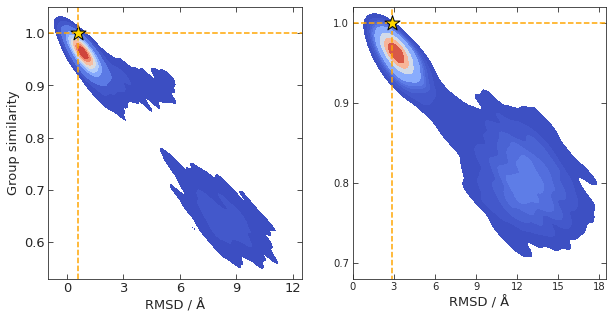

In [25]:
sns.set_style("ticks")
df_a = DataFrame(np.concatenate((RMSD_a.reshape(5000,1)*10, nsmbs_a.reshape(5000,1)),axis=1),columns=['RMSD','simi'])
df_b = DataFrame(np.concatenate((RMSD_b.reshape(5000,1)*10, nsmbs_b.reshape(5000,1)),axis=1),columns=['RMSD','simi'])
plt.figure(dpi=2400)

fig,ax=plt.subplots(1,2,figsize=(10,5))
# Custom the color, add shade and bandwidth
ax[0].set_xlim(-1,12.5)
ax[0].set_ylim(0.53,1.05)
ax[0].set_yticks(np.linspace(0.6,1.0,5))
ax[0].set_xticks(np.linspace(0,12,5))
ax[0].tick_params(right=True, top=True, labelright=False, labeltop=False,axis="both", direction='in', length=5)
ax[1].set_xlim(0,18.5)
ax[1].set_ylim(0.68,1.02)
ax[1].set_yticks(np.linspace(0.7,1,4))
ax[1].set_xticks(np.linspace(0,18,7))
ax[1].tick_params(right=True, top=True, labelright=False, labeltop=False,axis="both", direction='in', length=5)

sns.kdeplot(x=df_a.RMSD, y=df_a.simi, cmap="coolwarm", shade=True, ax=ax[0], bw_adjust=0.6)
sns.kdeplot(x=df_b.RMSD, y=df_b.simi, cmap="coolwarm", shade=True, ax=ax[1], bw_adjust=0.6)

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

ax[0].tick_params(axis='both', which='major', labelsize=13)
ax[0].plot([-1,0.35],[nsmbs_a.max(),nsmbs_a.max()],'--',color='orange')
ax[0].plot([0.95,12.5],[nsmbs_a.max(),nsmbs_a.max()],'--',color='orange')

ax[1].plot([0,2.5],[nsmbs_b.max(),nsmbs_b.max()],'--',color='orange')
ax[1].plot([3.5,18.5],[nsmbs_b.max(),nsmbs_b.max()],'--',color='orange')

ax[0].plot([RMSD_a[3832]*10,RMSD_a[3832]*10],[0.5,0.99],'--',color='orange')
ax[0].plot([RMSD_a[3832]*10,RMSD_a[3832]*10],[1.01,1.1],'--',color='orange')

ax[1].plot([RMSD_b[2152]*10,RMSD_b[2152]*10],[0.5,0.99],'--',color='orange')
ax[1].plot([RMSD_b[2152]*10,RMSD_b[2152]*10],[1.01,1.1],'--',color='orange')

ax[0].scatter(RMSD_a[3832]*10,nsmbs_a.max(),marker='*',color='gold',s=250,edgecolors='k')
ax[1].scatter(RMSD_b[2152]*10,nsmbs_b.max(),marker='*',color='gold',s=250,edgecolors='k')
ax[0].set_ylabel("Group similarity",fontsize=13)
ax[0].set_xlabel("RMSD / Å",fontsize=13)
ax[1].set_xlabel("RMSD / Å",fontsize=13)
ax[1].set_ylabel("",fontsize=13)

# plt.show()

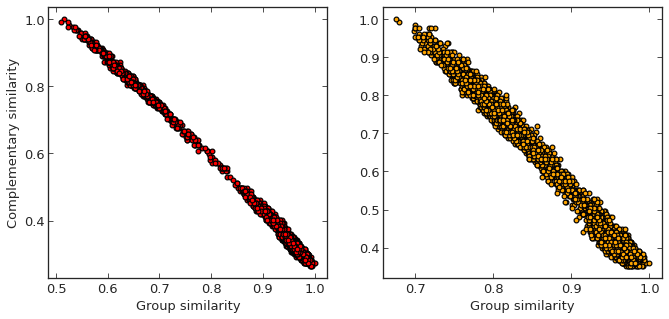

In [26]:
a=open('./results/NTL9.sim','r')
a=a.readlines()
b=[]
for i in range(12,5012):
    line=a[i].strip()
    line=a[i].split(" ")
    line=[float(i) for i in line if i != '\n' and i != '']
    b.append(line)
c=open('./results/A3D.sim','r')
c=c.readlines()
d=[]
for i in range(12,5012):
    line=c[i].strip()
    line=c[i].split(" ")
    line=[float(i) for i in line if i != '\n' and i != '']
    d.append(line)

fig,ax=plt.subplots(1,2,figsize=(11,5))
ax[0].scatter(nsmbs_a,(np.array(b)[:,1:][:,-5]-0.315)/(np.array(b)[:,1:][:,-5]-0.315).max(),marker='.',color='r',s=90,edgecolors='k',linewidths=1.2)
ax[0].tick_params(axis='both', which='major', labelsize=13)
ax[0].tick_params(right=True, top=True, labelright=False, labeltop=False,axis="both", direction='in', length=5)
ax[1].scatter(nsmbs_b,(np.array(d)[:,1:][:,-5]-0.1225)/(np.array(d)[:,1:][:,-5]-0.1225).max(),marker='.',color='orange',s=90,edgecolors='k',linewidths=1.2)
ax[1].tick_params(axis='both', which='major', labelsize=13)
ax[1].tick_params(right=True, top=True, labelright=False, labeltop=False,axis="both", direction='in', length=5)
# ax.set_xlim(13.4,13.9)
# ax[0].set_ylim(0.25,1.21)
ax[0].set_yticks(np.linspace(0.4,1,4))
ax[0].set_ylabel("Complementary similarity",fontsize=13)
ax[0].set_xlabel("Group similarity",fontsize=13)
ax[1].set_xlabel("Group similarity",fontsize=13)
ax[1].set_ylabel("",fontsize=13)
for i in [0,1]:
    for axis in ['top','bottom','left','right']:
        ax[i].spines[axis].set_linewidth(1.3)

## Protein G

/home/liweichang/anaconda3/envs/msm/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


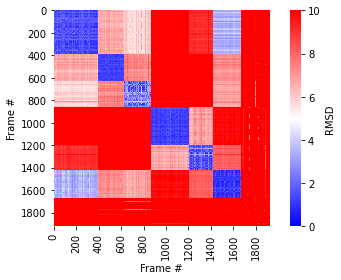

In [10]:
traj_file = './results/samples_3gb1_withrandom_shuffled.dcd'
native_pdb = './3GB1.pdb'
traj=md.load_dcd(traj_file,top=native_pdb)
labels=np.loadtxt('./samples_3gb1_label_withrandom_shuffled.dat')
traj=traj[labels==0]+traj[labels==1]+traj[labels==2]+traj[labels==3]+traj[labels==4] \
            +traj[labels==5]+traj[labels==-1]
rmsd_2d=np.zeros((len(traj),len(traj)))
upper_indices = np.triu_indices(len(traj),k=0)
lower_indices = (upper_indices[1],upper_indices[0])
all_CA = md.load_pdb(native_pdb).topology.select("name CA")
r2d = []
for i in range(len(traj)):
    r2d.append(md.rmsd(traj[i:],traj[i],atom_indices=all_CA))
rmsd_2d[lower_indices] = np.concatenate(r2d)
rmsd_2d[upper_indices] = np.concatenate(r2d)
sns.heatmap(rmsd_2d*10,square=True,xticklabels=200,yticklabels=200,cmap='bwr',cbar_kws={'label':'RMSD'},vmin=0,vmax=10)
plt.xlabel("Frame #")
plt.ylabel("Frame #")
ax = plt.gca()
ax.tick_params(direction='out')
plt.tight_layout()


In [5]:
Threshold = 0.6
feat = coor.featurizer(native_pdb)
residues = np.arange(0,56)
pairs = []                                                                                 
for i,r1 in enumerate(range(56)):
    for r2 in residues[r1:]:
        pairs.append([r1,r2])

pairs = np.array(pairs)
feature=feat.add_residue_mindist(pairs, scheme='closest-heavy',threshold=Threshold,periodic=False)
inp = pyemma.coordinates.load(traj_file, features=feat)


In [12]:
simi_matrix, _, feat_time = binary_simi_matrix(inp,simi_scale='scaled',scale=0)
tree, hie_tree, dic, cluster_time = agglomerative(inp, simi_matrix)

[385, 345, 297, 224, 218, 207]

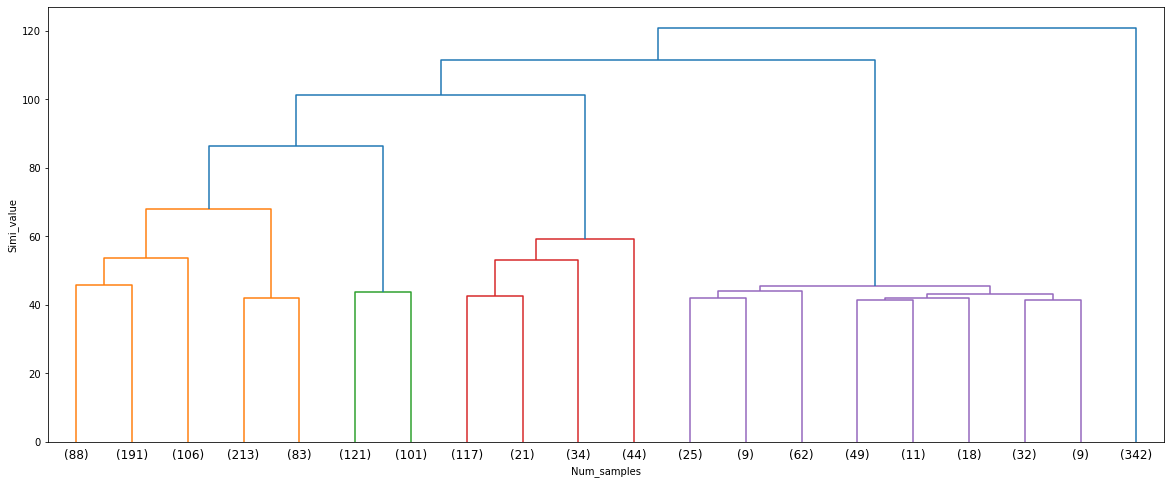

In [30]:
plot_simi_threshold(tree,20,min_simi=False)

In [27]:
def diff_step(tree):
    diff=[]
    single_merge=[]
    single_merge_step=[]
    step=[]
    inp_len=inp.shape[0]
    for i in list(range(tree.shape[0]))[1:][::-1]:
        a=tree[i][0]
        b=tree[i][1]
        if a > inp_len:
            a=tree[i][0]-inp_len
            if b > inp_len:
                b=tree[i][1]-inp_len
                temp_diff = tree[i][2] - max(tree[int(a)][2],tree[int(b)][2])
                diff.append(temp_diff)
                step.append(i)
            else:
                temp_diff = tree[i][2] - tree[int(a)][2]
                diff.append(temp_diff)
                step.append(i)
                single_merge.append(temp_diff)
                single_merge_step.append(b)
        else:
            if b > inp_len:
                b=tree[i][1]-inp_len
                temp_diff = tree[i][2] - tree[int(b)][2]
                diff.append(temp_diff)
                step.append(i)
                single_merge.append(temp_diff)
                single_merge_step.append(a)
    return diff, step

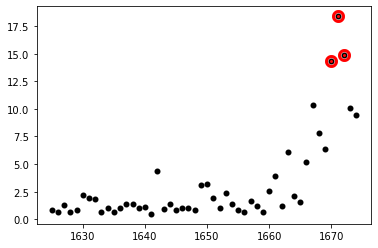

In [32]:
diff, step = diff_step(tree)
plt.scatter(step[:50],diff[:50],marker='.',linewidths=3,color='black')
plt.scatter(step[2:5],diff[2:5],marker='.',linewidths=10,color='r')

<Figure size 1440x576 with 0 Axes>

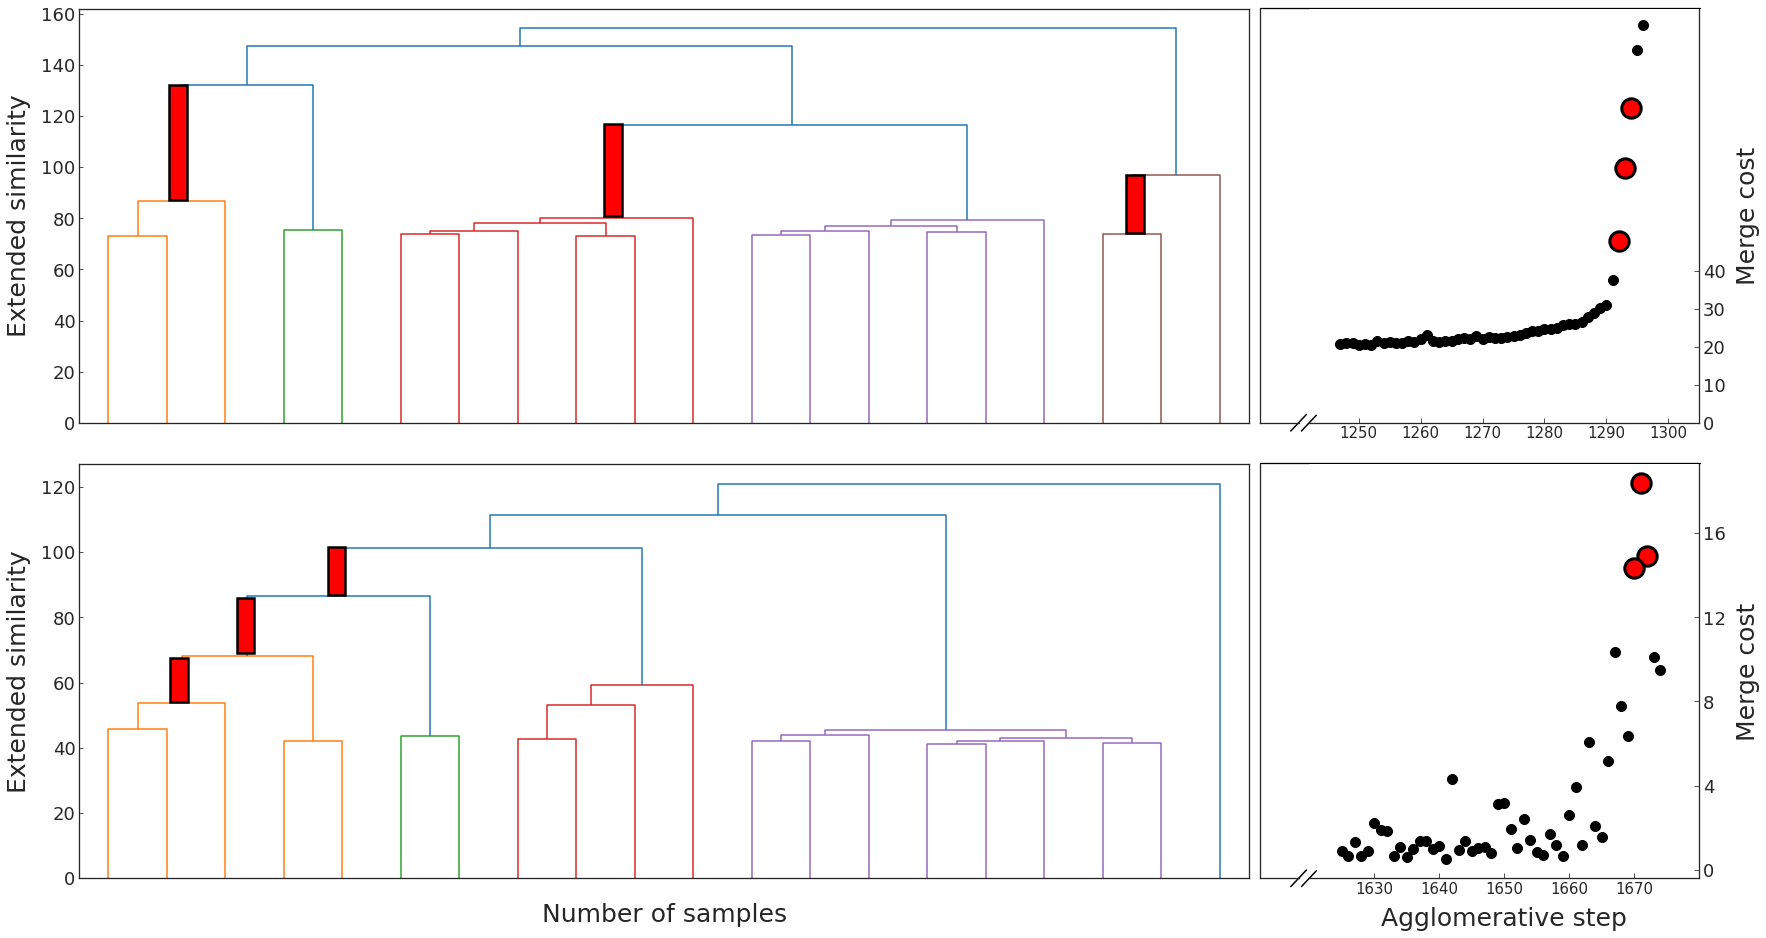

In [30]:
from matplotlib.patches import Rectangle
plt.figure(figsize=(20, 8), linewidth=500)
fig,ax=plt.subplots(2,3,figsize=(25, 16), linewidth=500,gridspec_kw={'width_ratios': [3, 0.1,1]})
ax[0][0].tick_params(axis='both', which='major', labelsize=18)
ax[0][1].tick_params(axis='both', which='major', labelsize=15)
ax[0][2].tick_params(axis='y', which='major', labelsize=18)
ax[0][2].tick_params(axis='x', which='major', labelsize=15)
tree=np.load('./results/pdna_clustering_tree.npy')
diff, step = diff_step(tree)
dend = shc.dendrogram(tree,p=20,truncate_mode='lastp',ax=ax[0][0])
ax[1][0].set_xlabel('Number of samples',fontsize=25,labelpad=25)
ax[0][0].set_ylabel('Extended similarity',fontsize=25,labelpad=10)
sns.set_style({"ytick.direction": "in"})
for i in [0,1]:
    for j in [0,1,2]:
        for axis in ['top','bottom','left','right']:
            ax[i][j].spines[axis].set_linewidth(1.3)

ax[0][0].add_patch(Rectangle((15.4, 87), 3, 45.35,edgecolor='k',facecolor='r', zorder=10,linewidth=2.5))
ax[0][0].add_patch(Rectangle((89.8, 80.8), 3, 36,edgecolor='k',facecolor='r', zorder=10,linewidth=2.5))
ax[0][0].add_patch(Rectangle((179, 74.4), 3, 22.5,edgecolor='k',facecolor='r', zorder=10,linewidth=2.5))
ax[0][1].scatter(step[:50],diff[:50],marker='.',linewidths=3,color='black')
kwargs = dict(transform=ax[0][1].transAxes, color='k', clip_on=False)
ax[0][1].plot((1-0.2,1+0.2), (-0.02,+0.02), **kwargs)

kwargs = dict(transform=ax[0][1].transAxes, color='k', clip_on=False)

ax[0][1].plot((0,11.3), (1.002,1.002), linewidth=1.3,**kwargs)

ax[0][2].scatter(step[:50],diff[:50],marker='.',s=400,facecolor='black')
ax[0][2].scatter(step[2:5],diff[2:5],marker='.',s=1500,edgecolor='black',facecolor='r',linewidth=3)
kwargs = dict(transform=ax[0][2].transAxes, color='k', clip_on=False)
ax[0][2].plot((-0.02,+0.018), (-0.02,+0.018), **kwargs)
ax[0][2].set_yticks([])
ax[0][1].set_xticks([])

ax[0][1].set_xlim(1244,1244.5)
ax[0][2].set_xlim(1242,1305)
ax[0][1].tick_params(direction='in', length=5)
ax[0][2].tick_params(direction='in', length=5)
ax[0][1].set_yticks([])
ax[0][1].spines['right'].set_visible(False)
ax[0][2].spines['left'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
ax[0][2].spines['top'].set_visible(False)
ax[0][2].yaxis.set_label_position("right")
ax[0][2].set_ylabel('Merge cost',fontsize=25,labelpad=10)
ax[0][2].set_yticks(range(0,50,10))
ax[0][2].yaxis.tick_right()

#######################
ax[1][0].tick_params(axis='both', which='major', labelsize=18)
ax[1][1].tick_params(axis='both', which='major', labelsize=15)
ax[1][2].tick_params(axis='y', which='major', labelsize=18)
ax[1][2].tick_params(axis='x', which='major', labelsize=15)
G_tree=np.load('./results/3gb1_clustering_tree.npy')
G_diff, G_step=diff_step(tree)
dend = shc.dendrogram(G_tree,p=20,truncate_mode='lastp',ax=ax[1][0])
ax[1][0].set_ylabel('Extended similarity',fontsize=25,labelpad=10)
sns.set_style({"ytick.direction": "in"})

ax[1][0].add_patch(Rectangle((15.6, 54), 3, 13.4,edgecolor='k',facecolor='r', zorder=10,linewidth=2.5))
ax[1][0].add_patch(Rectangle((26.9, 69), 3, 17,edgecolor='k',facecolor='r', zorder=10,linewidth=2.5))
ax[1][0].add_patch(Rectangle((42.5, 87), 3, 14.7,edgecolor='k',facecolor='r', zorder=10,linewidth=2.5))
ax[1][1].scatter(G_step[:50],G_diff[:50],marker='.',linewidths=3,color='black')
kwargs = dict(transform=ax[1][1].transAxes, color='k', clip_on=False)
ax[1][1].plot((1-0.2,1+0.2), (-0.02,+0.02), **kwargs)

kwargs = dict(transform=ax[1][1].transAxes, color='k', clip_on=False)

ax[1][1].plot((0,11.3), (1.002,1.002), linewidth=1.3,**kwargs)

ax[1][2].scatter(G_step[:50],G_diff[:50],marker='.',s=400,facecolor='black')
ax[1][2].scatter(G_step[2:5],G_diff[2:5],marker='.',s=1500,edgecolor='black',facecolor='r',linewidth=3)
kwargs = dict(transform=ax[1][2].transAxes, color='k', clip_on=False)
ax[1][2].plot((-0.02,+0.018), (-0.02,+0.018), **kwargs)
ax[1][2].set_yticks([])
ax[1][1].set_xticks([])

ax[1][1].set_xlim(1244,1244.5)
ax[1][2].set_xlim(1620,1680)
ax[1][1].tick_params(direction='in', length=5)

ax[1][2].tick_params(direction='in', length=5)
ax[1][1].set_yticks([])
ax[1][1].spines['right'].set_visible(False)
ax[1][2].spines['left'].set_visible(False)
ax[1][1].spines['top'].set_visible(False)
ax[1][2].spines['top'].set_visible(False)
ax[1][2].yaxis.set_label_position("right")
ax[1][2].set_ylabel('Merge cost',fontsize=25,labelpad=10)
ax[1][2].set_yticks(range(0,20,4))
ax[1][2].set_xticks(range(1630,1680,10))

ax[1][2].yaxis.tick_right()
ax[1][2].set_xlabel('Agglomerative step',fontsize=25,labelpad=10)

plt.setp(ax[0][0].get_xticklabels(), visible=False)
plt.setp(ax[1][0].get_xticklabels(), visible=False)

plt.subplots_adjust(left=0.1, bottom=None, right=1, top=None, wspace=0.02, hspace=0.1)


## NuG2

Text(0.5, 0, 'Density')

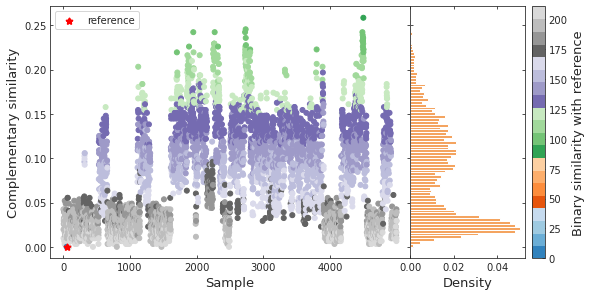

In [32]:
a=open('./NuG2.sim','r')
a=a.readlines()
b=[]
for i in range(12,5012):
    line=a[i].strip()
    line=a[i].split(" ")
    line=[float(i) for i in line if i != '\n' and i != '']
    b.append(line)


simi_matrix=np.load('./NuG2_5000_sample_simi_matrix.npy')
fliped_simi_matrix = np.fliplr(simi_matrix)
mirror_binary_simi=simi_matrix+np.rot90(fliped_simi_matrix)
sum_mirror_binary_simi = np.sum(mirror_binary_simi.T,axis=1)
sum_mirror_binary_simi_index = np.vstack((sum_mirror_binary_simi,range(len(sum_mirror_binary_simi)))).T
scaled_b=(np.array(b)[:,1:][:,-5]/np.array(b)[:,1:][:,-5].min()-1)*1000
np.array(b)[:,1:][:,-5].argmin()

fig = plt.figure(figsize=(5,5))
ax=fig.add_axes([1,1,1,0.7])
ax.set_xticks([0,1000,2000,3000,4000])
im=ax.scatter(range(sum_mirror_binary_simi.shape[0]),scaled_b,marker='.',s=100,c=mirror_binary_simi[48],cmap='tab20c')

ax1=fig.add_axes([2,1,0.4,0.7],sharey=ax)
ax1.tick_params(axis="y", labelleft=False)
ax1.tick_params(axis="x")#, labelbottom=False,bottom=False)
histogram=ax1.hist(scaled_b, bins=80, weights=np.ones(len(scaled_b)) / len(scaled_b),orientation='horizontal',color='sandybrown')

ax.scatter(48,scaled_b[48],marker='*',color='r',linewidth=2,label='reference')
cbar=fig.colorbar(im,ax=ax1)
cbar.set_label('Binary similarity with reference',fontsize=13)
ax.tick_params(right=True, top=True, labelright=False, labeltop=False,axis="both", direction='in', length=3)
ax1.tick_params(right=True, top=True, labelright=False, labeltop=False,axis="both", direction='in', length=3)

ax.legend()

ax.set_xlim(-200,5200)
ax.set_ylabel('Complementary similarity', fontsize=13)
ax.set_xlabel('Sample', fontsize=13)
ax1.set_xlabel('Density', fontsize=13)